## Model Training on Season Average Stats

In [41]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)

### Load Dataset

In [30]:
df = pd.read_csv('../data/preprocessed/stats_salaries_avg.csv')
df

FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT       FTM  \
0     1.440000  3.840000  0.375000  0.860000  2.440000  0.352459  0.280000   
1     1.602740  3.794521  0.422383  0.849315  2.013699  0.421769  0.698630   
2     0.771429  1.914286  0.402985  0.314286  1.085714  0.289474  0.114286   
3     0.833333  2.166667  0.384615  0.583333  1.500000  0.388889  0.166667   
4     0.705882  1.941176  0.363636  0.647059  1.529412  0.423077  0.235294   
...        ...       ...       ...       ...       ...       ...       ...   
8587  4.727273  9.393939  0.503226  0.757576  2.575758  0.294118  1.818182   
8588  1.028571  2.057143  0.500000  0.257143  0.857143  0.300000  0.428571   
8589  1.176471  2.000000  0.588235  0.294118  0.558824  0.526316  0.764706   
8590  1.961538  5.153846  0.380597  1.243590  3.487179  0.356618  1.243590   
8591  1.666667  4.727273  0.352564  0.909091  3.136364  0.289855  1.000000   

           FTA    FT_PCT      OREB      DREB       REB       AST       STL  \
0     0.320000  0.875000  0.200000  1.280000  1.480000  0.520000  0.320000   
1     0.863014  0.809524  0.219178  0.986301  1.205479  0.739726  0.452055   
2     0.200000  0.571429  0.142857  0.657143  0.800000  0.400000  0.171429   
3     0.166667  1.000000  0.166667  0.583333  0.750000  0.333333  0.000000   
4     0.235294  1.000000  0.058824  0.647059  0.705882  0.588235  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8587  2.545455  0.714286  1.621212  3.848485  5.469697  2.969697  0.939394   
8588  0.514286  0.833333  0.514286  1.142857  1.657143  0.371429  0.342857   
8589  1.029412  0.742857  0.617647  0.852941  1.470588  0.500000  0.117647   
8590  1.435897  0.866071  0.371795  1.756410  2.128205  3.576923  1.230769   
8591  1.287879  0.776471  0.348485  1.590909  1.939394  3.469697  1.030303   

           BLK        TO        PF        PTS  PLUS_MINUS  WON_GAME  \
0     0.100000  0.580000  0.860000   4.020000       -15.0  0.440000   
1     0.027397  0.520548  0.958904   4.753425        33.0  0.534247   
2     0.057143  0.314286  0.600000   1.971429        11.0  0.457143   
3     0.083333  0.416667  0.500000   2.416667        -2.0  0.833333   
4     0.058824  0.352941  0.705882   2.294118       -33.0  0.941176   
...        ...       ...       ...        ...         ...       ...   
8587  0.560606  1.803030  3.681818  12.030303      -379.0  0.257576   
8588  0.114286  0.342857  1.085714   2.742857       -35.0  0.400000   
8589  0.176471  0.323529  1.264706   3.411765        54.0  0.323529   
8590  0.243590  1.192308  2.243590   6.410256        47.0  0.628205   
8591  0.363636  1.060606  1.984848   5.242424      -239.0  0.560606   

      SECS_PLAYED    C         F         G  Atlanta Hawks  Boston Celtics  \
0      846.440000  0.0  0.000000  0.000000              0               0   
1      742.356164  0.0  0.000000  0.150685              0               0   
2      439.200000  0.0  0.000000  0.028571              0               0   
3      378.750000  0.0  0.000000  0.000000              0               0   
4      403.294118  0.0  0.000000  0.000000              0               0   
...           ...  ...       ...       ...            ...             ...   
8587  1606.424242  0.0  0.969697  0.000000              0               0   
8588   484.200000  0.0  0.142857  0.000000              0               0   
8589   506.352941  0.0  0.000000  0.000000              0               0   
8590  1341.000000  0.0  0.000000  0.358974              0               0   
8591  1160.015152  0.0  0.000000  0.075758              0               0   

      Brooklyn Nets  Charlotte Hornets  Chicago Bulls  Cleveland Cavaliers  \
0                 0                  0              0                    0   
1                 0                  0              1                    0   
2                 0                  0              1                    0   
3                 0                  0         

### Train-Test Split
To start off, we conduct a train-test split:

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['INFLATION_ADJ_SALARY'])
y = df['INFLATION_ADJ_SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Base model
We construct a base model to compare model results against. This will just output the mean every time.

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = [y_train.mean()] * len(y_test)
print("Name: Base Model (Mean)")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))

Name: Base Model (Mean)
MAE: 5231909.39720646
MSE: 49673100702247.98
RMSE: 7047914.635000057
R2: -0.0022873992028280554


### Data Scaling

We scale/normalize the data to perform better on different types of models. The resultant `preprocessor` will be used in the model pipelines.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

ss_columns = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB',
              'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'SECS_PLAYED']
mm_columns = ['YEARS_SINCE_2003']  # uniform distribution; not normal distribution

preprocessor = ColumnTransformer([
    ('standard', StandardScaler(), ss_columns),
    ('minmax', MinMaxScaler(), mm_columns),
], remainder='passthrough') # note: order of columns is ss_columns + mm_columns + remainder cols

### Hyperparameter Optimization and Model Selection

We run different combinations and models on the dataset:

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv  # enable halving grid search

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import HalvingGridSearchCV

In [39]:
hyperparameters = {
    'Linear': {
        'model__fit_intercept': [True, False],
    },
    'Ridge': {
        'model__fit_intercept': [True, False],
        'model__alpha': [1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1],
    },
    'Lasso': {
        'model__fit_intercept': [True, False],
        'model__alpha': [1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1],
        'model__precompute': [True, False],
        'model__selection': ['cyclic', 'random'],
    },
    'KNN': {
        'model__n_neighbors': [4, 6, 8, 10, 15, 20],
        'model__leaf_size': list(range(20, 40, 2)),
        'model__p': [1, 2],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['minkowski', 'chebyshev'],
    },
    'SGD': {
        'model__fit_intercept': [True, False],
        'model__loss': ['squared_error', 'huber'],
        'model__penalty': ['l1', 'l2'],
        'model__alpha': [1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1],
        'model__learning_rate': ['optimal', 'invscaling', 'adaptive'],
        'model__shuffle': [True, False],
        'model__average': [True, False],
        'model__max_iter': [1000, 5000, 15000]
    },
    'SVR': {
        'model__epsilon': [0, 0.1, 0.2, 0.3, 0.5],
        'model__intercept_scaling': [0.5, 1, 2, 3, 5],
        'model__fit_intercept': [True, False],
        'model__C': [0.1, 0.5, 1, 5, 10]
    },
    'RF': {
        'model__bootstrap': [True, False],
        'model__max_depth': [10, 50, 100, None],
        'model__max_features': ['auto', 'sqrt'],
        'model__min_samples_leaf': [1, 2, 4],
        'model__min_samples_split': [2, 5, 10],
        'model__n_estimators': [10, 50, 100, 200, 400, 600],
    },
    'AB': {
        'model__base_estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=10),
                           DecisionTreeRegressor(max_depth=100), DecisionTreeRegressor(max_depth=None)],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.5, 2],
        'model__loss': ['linear', 'square'],
        'model__n_estimators': [10, 50, 100, 200, 400, 600],
    },
    'GB': {
        'model__loss': ['squared_error', 'absolute_error'],
        'model__learning_rate': [1e-4, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1],
        'model__max_depth': [10, 50, 100, None],
        'model__max_features': ['auto', 'sqrt'],
        'model__min_samples_leaf': [1, 2, 4],
        'model__min_samples_split': [2, 5, 10],
        'model__n_estimators': [10, 50, 100, 200, 400, 600],
    }
}

In [40]:
models = [
    ('Linear', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('SGD', SGDRegressor()),
    ('SVR', LinearSVR()),
    ('RF', RandomForestRegressor()),
    ('AB', AdaBoostRegressor()),
    ('GB', GradientBoostingRegressor())
]

results = {}
for name, model in models:
    param_grid = hyperparameters[name]
    # faster than grid search, increases samples & decreases num. combinations with each iter
    pipeline = Pipeline([
        ('scaling', preprocessor),
        ('model', model)
    ])
    search = HalvingGridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10)
    result = search.fit(X_train, y_train)
    print('Model Name: %s' % name)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    results[name] = result

Model Name: Linear
Best Score: -3493245.316840102
Best Hyperparameters: {'model__fit_intercept': True}
Model Name: Ridge
Best Score: -3498353.0052354885
Best Hyperparameters: {'model__alpha': 1, 'model__fit_intercept': True}


/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1686093421002303.2, tolerance: 926534774286.3157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2771654007124171.5, tolerance: 1215728701080.4473
  model = cd_fast.enet_coordinate_descent_gram(
/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2406670602721340.5, tolerance: 1437613822714.3699
  model = cd_fast.enet_coordinate_descent_gram(
/Users/achung/.pyenv

Model Name: Lasso
Best Score: -3498916.8864122382
Best Hyperparameters: {'model__alpha': 1e-10, 'model__fit_intercept': False, 'model__precompute': False, 'model__selection': 'random'}
Model Name: KNN
Best Score: -3259110.323586311
Best Hyperparameters: {'model__leaf_size': 32, 'model__metric': 'minkowski', 'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}


/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

Model Name: SGD
Best Score: -3319285.6881964905
Best Hyperparameters: {'model__alpha': 1e-10, 'model__average': False, 'model__fit_intercept': True, 'model__learning_rate': 'optimal', 'model__loss': 'huber', 'model__max_iter': 5000, 'model__penalty': 'l1', 'model__shuffle': False}
Model Name: SVR
Best Score: -5095782.134195416
Best Hyperparameters: {'model__C': 10, 'model__epsilon': 0.2, 'model__fit_intercept': True, 'model__intercept_scaling': 5}
Model Name: RF
Best Score: -3306382.651721019
Best Hyperparameters: {'model__bootstrap': True, 'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 600}


/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model Name: AB
Best Score: -2971072.4307372374
Best Hyperparameters: {'model__base_estimator': DecisionTreeRegressor(max_depth=100), 'model__learning_rate': 1, 'model__loss': 'square', 'model__n_estimators': 600}


/Users/achung/.pyenv/versions/3.10.0/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model Name: GB
Best Score: -3169396.73019695
Best Hyperparameters: {'model__learning_rate': 0.01, 'model__loss': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 600}


### Save best hyperparameters and models
Save in for later use (since running the training takes a long time).

In [44]:
best_params = {}

for name, result in results.items():
    if name == 'AB':  # DecisionTreeRegressor not json serializable
        result.param_grid['model__base_estimator'] = [
            f'DecisionTree(max_depth={tree.max_depth})' for tree in result.param_grid['model__base_estimator']]
        result.best_params_['model__base_estimator'] = f'DecisionTree(max_depth={result.best_params_["model__base_estimator"].max_depth})'

    best_params[name] = {
        "param_grid": result.param_grid,
        "best_params": result.best_params_,
        "best_score": result.best_score_,
        "scoring": result.scoring
    }

with open("../models/model_training_avg_best_params.json", "w") as outfile:
    json.dump(best_params, outfile)

In [52]:
import joblib

for name, result in results.items():
    joblib.dump(result.best_estimator_, f'../models/avg/{name.lower()}.joblib')

### Plot validation curves
Save cross-validation data and plot the validation curves.

In [62]:
cv_results = {}

for name, result in results.items():
    cv_results[name] = pd.DataFrame(result.cv_results_)
    cv_results[name].to_csv(f'../models/avg/training/{name.lower()}.csv', index=False)

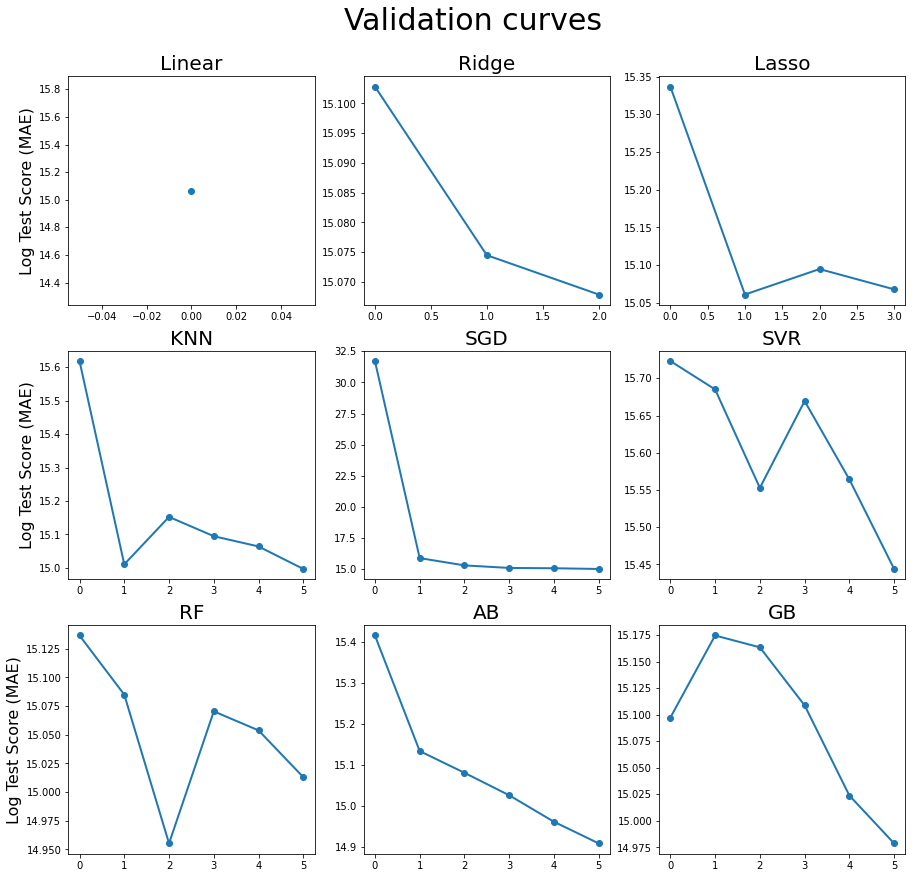

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, (name, result) in enumerate(cv_results.items()):
    row, col = i // 3, i % 3
    grouped_by_iter_df = result.groupby('iter').mean()
    iterations = grouped_by_iter_df.index
    test_scores = grouped_by_iter_df['mean_test_score']
    log_test_scores = np.log(test_scores * -1)

    axs[row][col].set_title(name, fontsize=20)
    if col == 0:
        axs[row][col].set_ylabel('Log Test Score (MAE)', fontsize=16)
    axs[row][col].plot(iterations, log_test_scores, lw=2, marker='o')

fig.suptitle('Validation curves', fontsize=30)
fig.subplots_adjust(bottom=0, top=0.9)
plt.show()
fig.savefig('../models/avg/training/validation_curves.png', bbox_inches='tight')

### Evaluate best models on test set

In [101]:
test_results = {}

for name, result in results.items():
    y_pred = result.best_estimator_.predict(X_test)
    test_results[name] = {
        'mae': mean_absolute_error(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': mean_squared_error(y_test, y_pred, squared=False),
        'r2': r2_score(y_test, y_pred)
    }

with open("../models/model_testing_avg_results.json", "w") as outfile:
    json.dump(test_results, outfile)